In [ ]:
!pip install catboost
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import randint as sp_randint
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.models import Sequential
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizkiilham1004","key":"a17167a3a7e1d43c7ee43496df134663"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 May  3 13:04 kaggle.json


In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd

/content


In [ ]:
!kaggle datasets download -d ujjwalchowdhury/energy-efficiency-data-set

Dataset URL: https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set
License(s): CC0-1.0
  0% 0.00/6.27k [00:00<?, ?B/s]
100% 6.27k/6.27k [00:00<00:00, 5.64MB/s]


In [ ]:
!unzip energy-efficiency-data-set.zip

Archive:  energy-efficiency-data-set.zip
  inflating: energy_efficiency_data.csv  


In [ ]:
df = pd.read_csv('energy_efficiency_data.csv')

In [ ]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

<Axes: >

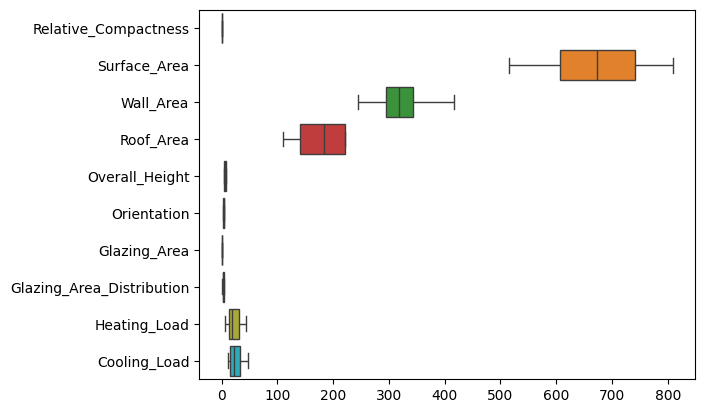

In [ ]:
import seaborn as sns
sns.boxplot(df, orient = 'h')

### **Conclusion about Data:**

The Data is clean.

In [ ]:
X=df.drop(['Heating_Load','Cooling_Load'],axis=1)
Y = df[['Heating_Load', 'Cooling_Load']]
Y1= df[['Heating_Load']]
Y2= df[['Cooling_Load']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, Y1, Y2, test_size=0.33, random_state = 20)

MinMax = MinMaxScaler(feature_range= (0,1))
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

In [ ]:
X

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [ ]:
Y

,Heating_Load,Cooling_Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [ ]:
import pickle
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor

# Train heating model
heating_model = CatBoostRegressor(border_count=5, depth=10, iterations=10000, learning_rate=0.02, random_state=42)
heating_model.fit(X_train, y1_train)
actr1 = r2_score(y1_train, heating_model.predict(X_train))
acte1 = r2_score(y1_test, heating_model.predict(X_test))
y1_pred = heating_model.predict(X_test)

# Save heating model
with open('Heating_model.pkl', 'wb') as file:
    pickle.dump(heating_model, file)

# Train cooling model
cooling_model = CatBoostRegressor(border_count=5, depth=10, iterations=10000, learning_rate=0.02, random_state=42)
cooling_model.fit(X_train, y2_train)
actr2 = r2_score(y2_train, cooling_model.predict(X_train))
acte2 = r2_score(y2_test, cooling_model.predict(X_test))
y2_pred = cooling_model.predict(X_test)

# Save cooling model
with open('Cooling_model.pkl', 'wb') as file:
    pickle.dump(cooling_model, file)


Streaming output truncated to the last 5000 lines.
5000:	learn: 0.0035098	total: 7.34s	remaining: 7.33s
5001:	learn: 0.0035077	total: 7.34s	remaining: 7.33s
5002:	learn: 0.0035057	total: 7.34s	remaining: 7.33s
5003:	learn: 0.0035041	total: 7.34s	remaining: 7.33s
5004:	learn: 0.0035023	total: 7.34s	remaining: 7.33s
5005:	learn: 0.0035002	total: 7.34s	remaining: 7.33s
5006:	learn: 0.0034972	total: 7.34s	remaining: 7.32s
5007:	learn: 0.0034926	total: 7.35s	remaining: 7.32s
5008:	learn: 0.0034886	total: 7.35s	remaining: 7.32s
5009:	learn: 0.0034852	total: 7.35s	remaining: 7.32s
5010:	learn: 0.0034822	total: 7.35s	remaining: 7.32s
5011:	learn: 0.0034803	total: 7.35s	remaining: 7.31s
5012:	learn: 0.0034778	total: 7.35s	remaining: 7.31s
5013:	learn: 0.0034759	total: 7.35s	remaining: 7.31s
5014:	learn: 0.0034710	total: 7.35s	remaining: 7.31s
5015:	learn: 0.0034684	total: 7.35s	remaining: 7.31s
5016:	learn: 0.0034638	total: 7.36s	remaining: 7.3s
5017:	learn: 0.0034599	total: 7.36s	remaining: 7.

In [ ]:
print("CatBoostRegressor: R-Squared on train dataset={}".format(actr1))
print("CatBoostRegressor: R-Squared on Y1test dataset={}".format(acte1))
print("CatBoostRegressor: R-Squared on train dataset={}".format(actr2))
print("CatBoostRegressor: R-Squared on Y2test dataset={}".format(acte2))

CatBoostRegressor: R-Squared on train dataset=0.9999999999791284
CatBoostRegressor: R-Squared on Y1test dataset=0.9985652715060828
CatBoostRegressor: R-Squared on train dataset=0.9999999999393913
CatBoostRegressor: R-Squared on Y2test dataset=0.9927296805043709


In [ ]:
# Data input yang berbeda
input_data_different = np.array([[1.2, 516, 570, 190.90, 8.0, 5, 0.1, 0]])

# Prediksi Heating_Load
heating_load_pred_different = model_heating.predict(input_data_different)

# Prediksi Cooling_Load
cooling_load_pred_different = model_cooling.predict(input_data_different)

# Tampilkan hasil prediksi
print("Prediksi Heating_Load (Data Input Berbeda):", heating_load_pred_different)
print("Prediksi Cooling_Load (Data Input Berbeda):", cooling_load_pred_different)
